<a href="https://colab.research.google.com/github/rahiakela/deep-learning-research-and-practice/blob/main/deep-learning-basics/cross_entropy_loss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Cross-Entropy Loss

In the context of information theory, the cross entropy between two discrete probability distributions is related to KL divergence, a metric that captures how close the two distributions are.

In binary classification, the sigmoid activation is used in the output layer and the neural network outputs a probability score `(p)` between 0 and 1.

In case of multiclass classification, we use the softmax activation at the output layer to get a vector of predicted probabilities `p`.

##Setup

In [ ]:
import numpy as np


import seaborn as sns
from matplotlib import pyplot as plt
sns.set()

np.seterr(divide = 'ignore')

##Binary Classification

Let’s start this section by reviewing the `log` function in the interval $[0,1]$.

Observe how `-log(x)` approaches 0 as `x` approaches 1.

[Text(0.5, 0, 'x'), Text(0, 0.5, '-log(x)')]

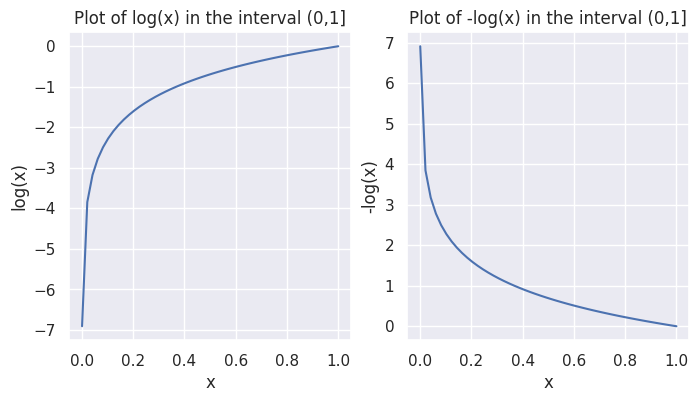

In [2]:
# Let’s start by reviewing the log function in the interval (0,1]
x_arr = np.linspace(0.001,1)
log_x = np.log(x_arr)

fig, axes = plt.subplots(1, 2,figsize=(8,4))

sns.lineplot(ax=axes[0], x=x_arr, y=log_x)
axes[0].set_title('Plot of log(x) in the interval (0,1]')
axes[0].set(xlabel='x', ylabel='log(x)')

sns.lineplot(ax=axes[1], x=x_arr, y=-log_x)
axes[1].set_title('Plot of -log(x) in the interval (0,1]')
axes[1].set(xlabel='x', ylabel='-log(x)')

In [3]:
x_arr

array([0.001     , 0.02138776, 0.04177551, 0.06216327, 0.08255102,
       0.10293878, 0.12332653, 0.14371429, 0.16410204, 0.1844898 ,
       0.20487755, 0.22526531, 0.24565306, 0.26604082, 0.28642857,
       0.30681633, 0.32720408, 0.34759184, 0.36797959, 0.38836735,
       0.4087551 , 0.42914286, 0.44953061, 0.46991837, 0.49030612,
       0.51069388, 0.53108163, 0.55146939, 0.57185714, 0.5922449 ,
       0.61263265, 0.63302041, 0.65340816, 0.67379592, 0.69418367,
       0.71457143, 0.73495918, 0.75534694, 0.77573469, 0.79612245,
       0.8165102 , 0.83689796, 0.85728571, 0.87767347, 0.89806122,
       0.91844898, 0.93883673, 0.95922449, 0.97961224, 1.        ])

In [4]:
# As log(0) is -∞
log_x

array([-6.90775528, -3.84493671, -3.17544499, -2.77799104, -2.49433875,
       -2.27362088, -2.09291972, -1.93992808, -1.80726684, -1.69016112,
       -1.58534279, -1.49047643, -1.40383506, -1.32410554, -1.25026609,
       -1.181506  , -1.1171712 , -1.05672637, -0.9997278 , -0.94580362,
       -0.89463907, -0.84596542, -0.79955132, -0.75519629, -0.71272534,
       -0.67198493, -0.63283954, -0.59516895, -0.55886607, -0.52383505,
       -0.48998978, -0.45725262, -0.42555329, -0.39482801, -0.36501869,
       -0.33607232, -0.30794031, -0.28057811, -0.25394471, -0.22800227,
       -0.20271587, -0.17805313, -0.15398403, -0.13048066, -0.10751703,
       -0.08506892, -0.06311369, -0.04163014, -0.02059845,  0.        ])

In [5]:
-log_x

array([ 6.90775528,  3.84493671,  3.17544499,  2.77799104,  2.49433875,
        2.27362088,  2.09291972,  1.93992808,  1.80726684,  1.69016112,
        1.58534279,  1.49047643,  1.40383506,  1.32410554,  1.25026609,
        1.181506  ,  1.1171712 ,  1.05672637,  0.9997278 ,  0.94580362,
        0.89463907,  0.84596542,  0.79955132,  0.75519629,  0.71272534,
        0.67198493,  0.63283954,  0.59516895,  0.55886607,  0.52383505,
        0.48998978,  0.45725262,  0.42555329,  0.39482801,  0.36501869,
        0.33607232,  0.30794031,  0.28057811,  0.25394471,  0.22800227,
        0.20271587,  0.17805313,  0.15398403,  0.13048066,  0.10751703,
        0.08506892,  0.06311369,  0.04163014,  0.02059845, -0.        ])

In binary classification, the raw output of the neural network is passed through the sigmoid function, which outputs a probability score.

![](https://github.com/rahiakela/deep-learning-research-and-practice/blob/main/deep-learning-basics/images/b6a70a489a6de908b6cae40358563b32b151feb4-900x506.png?raw=1)

The binary cross-entropy loss, also called the log loss, is given by:

$$L(t,p)=−(t.log(p)+(1−t).log(1−p))$$

When `t = 1`, the second term in the above equation goes to zero, and the equation reduces to the following:

$$L(t,p)=−log(p)$$

Similarly, when the true label `t=0`, the term `t.log(p)` vanishes, and the expression for binary cross-entropy loss reduces to:

$$L(t,p)=−log(1−p)$$

Now, let’s plot the binary cross-entropy loss for different values of the predicted probability `p`.


Text(0, 0.5, 'Binary Cross-Entropy Loss')

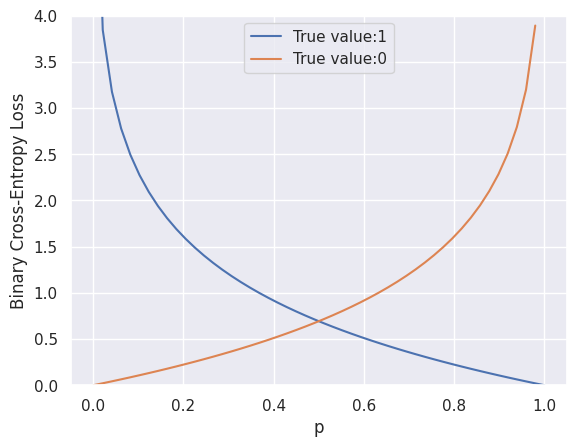

In [9]:
p = x_arr
bce_1 = -np.log(p)
bce_0 = -np.log(1-p)

plot1 = sns.lineplot(x=p, y=bce_1, label='True value:1').set(ylim=(0,4))
plot2 = sns.lineplot(x=p, y=bce_0, label='True value:0').set(ylim=(0,4))
plt.xlabel('p')
plt.ylabel('Binary Cross-Entropy Loss')

But which predictions does cross-entropy loss penalize the most?

Recall that `log(0)` → `-∞`; so `-log(0)` → `∞`.

Putting it all together, cross-entropy loss increases drastically when the network makes incorrect predictions with high confidence.

If there are $S$ samples in the dataset, then the total cross-entropy loss is the sum of the loss values over all the samples in the dataset.

$$L(t,p)=−\sum_{i=1}^S(t_i.log(p_i)+(1−t_i).log(1−p_i))$$

Let’s define a Python function to compute the binary cross-entropy loss.